In [1]:
import mysql.connector
from mysql.connector import errorcode
import psycopg2 as pg

import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, OldScalarFormatter
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY
#from matplotlib.finance import candlestick_ohlc, quotes_historical_yahoo_ohlc
import matplotlib.ticker as plticker
%matplotlib inline

DATABASE = 'stage'

if DATABASE == 'prod':
    config = {
      'user': 'alienbaby',
      'password': 'alienbabymoonangel',
      'host': 'intelligenttrading-aurora-production-primary-cluster.cluster-caexel1tmds5.us-east-1.rds.amazonaws.com',
      'port': '3306',
      'database': 'intelligenttrading_primary',
      'raise_on_warnings': True,
    }
    try:
      db_connection = mysql.connector.connect(**config)
    except mysql.connector.Error as err:
      if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
      elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
      else:
        print(err)
        
elif DATABASE == 'stage':
    config = {
      'user': 'alienbaby',
      'password': 'alienbabymoonangel',
      'host': 'intelligenttrading-aurora-production-postgres-cluster.cluster-caexel1tmds5.us-east-1.rds.amazonaws.com',
      'port': '5432',
      'dbname': 'primary_postgres'
    }

    try:
      db_connection = pg.connect(**config)
    except mysql.connector.Error as err:
      if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
      elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
      else:
        print(err)
    


In [141]:
transaction_coin = 'XMR'
counter_coin = 0
resample_period = 60
records = 500

In [142]:
#query = " SELECT * FROM signal_signal WHERE \
#transaction_currency='%s' AND counter_currency=%d " % (transaction_coin, counter_coin)
#query = " SELECT * FROM signal_signal"
#signals_df = pd.read_sql(query, con=db_connection)

# make index a timestamp relative_strength
#signals_df['timestamp'] = pd.to_datetime(signals_df['timestamp'], unit='s')
#signals_df.index = pd.DatetimeIndex(signals_df.timestamp)
#signals_df.sort_index(inplace=True)


In [143]:
#signals_df.tail(30)

In [144]:
query = " SELECT * FROM indicator_eventselementary WHERE \
transaction_currency='%s' AND counter_currency=%d AND resample_period=%d  " % (transaction_coin, counter_coin, resample_period)
elem_events_df = pd.read_sql(query, con=db_connection)

# make index a timestamp relative_strength
elem_events_df['timestamp'] = pd.to_datetime(elem_events_df['timestamp'], unit='s')
elem_events_df.index = pd.DatetimeIndex(elem_events_df.timestamp)
elem_events_df.sort_index(inplace=True)
#elem_events_df.tail(10)

In [145]:
#query = " SELECT * FROM indicator_eventslogical WHERE \
#transaction_currency='%s' AND counter_currency=%d AND resample_period=%d  " % (transaction_coin, counter_coin, resample_period)
query = " SELECT * FROM indicator_eventslogical"
log_events_df = pd.read_sql(query, con=db_connection)

# make index a timestamp relative_strength
log_events_df['timestamp'] = pd.to_datetime(log_events_df['timestamp'], unit='s')
log_events_df.index = pd.DatetimeIndex(log_events_df.timestamp)
log_events_df.sort_index(inplace=True)
#log_events_df

In [146]:
# get RESAMPL
query = (" SELECT * FROM indicator_priceresampl WHERE \
transaction_currency='%s' AND \
counter_currency=%d \
and resample_period=%d " ) % (transaction_coin, counter_coin, resample_period)

resampl_df = pd.read_sql(query, con=db_connection)

# make index a timestamp relative_strength
resampl_df['timestamp'] = pd.to_datetime(resampl_df['timestamp'], unit='s')
resampl_df.index = pd.DatetimeIndex(resampl_df.timestamp)


resampl_df.sort_index(inplace=True)
res_df = resampl_df.tail(records)
#res_df.tail(5)


In [147]:
# Ichimoku
ichi_param_1_9 = 20
ichi_param_2_26 = 60
ichi_param_3_52 = 120
ichi_param_4_26 = 30

#res_df = res_df[-200:-4]
res_df = res_df.tail(ichi_param_2_26*ichi_param_2_26)



In [148]:
# get SMA 1_9
query = (" SELECT * FROM indicator_sma WHERE \
transaction_currency='%s' AND \
counter_currency=%d \
and resample_period=%d AND sma_period=%d" ) % (transaction_coin, counter_coin, resample_period, ichi_param_1_9)

sma9_df = pd.read_sql(query, con=db_connection)
sma9_df['timestamp'] = pd.to_datetime(sma9_df['timestamp'], unit='s')
sma9_df.index = pd.DatetimeIndex(sma9_df.timestamp)
sma9_df = sma9_df.tail(ichi_param_2_26*ichi_param_2_26)

# get SMA 1_26
query = (" SELECT * FROM indicator_sma WHERE \
transaction_currency='%s' AND \
counter_currency=%d \
and resample_period=%d AND sma_period=%d" ) % (transaction_coin, counter_coin, resample_period, ichi_param_2_26)

sma26_df = pd.read_sql(query, con=db_connection)
sma26_df['timestamp'] = pd.to_datetime(sma26_df['timestamp'], unit='s')
sma26_df.index = pd.DatetimeIndex(sma26_df.timestamp)
sma26_df = sma26_df.tail(ichi_param_2_26*ichi_param_2_26)

# get SMA 52
query = (" SELECT * FROM indicator_sma WHERE \
transaction_currency='%s' AND \
counter_currency=%d \
and resample_period=%d AND sma_period=%d" ) % (transaction_coin, counter_coin, resample_period, ichi_param_3_52)

sma52_df = pd.read_sql(query, con=db_connection)
sma52_df['timestamp'] = pd.to_datetime(sma52_df['timestamp'], unit='s')
sma52_df.index = pd.DatetimeIndex(sma52_df.timestamp)
sma52_df = sma52_df.tail(ichi_param_2_26*ichi_param_2_26)



In [149]:
nine_period_high = res_df['high_price'].rolling(window=ichi_param_1_9, center=False, min_periods=4).mean()
nine_period_low = res_df['low_price'].rolling(window=ichi_param_1_9, center=False, min_periods=4).mean()
tenkan_sen_conversion = (nine_period_high + nine_period_low) /2

#tenkan_sen_conversion = res_df['midpoint_price'].rolling(window=ichi_param_1_9, center=False, min_periods=4).mean()
#tenkan_sen_conversion = sma9_df['sma_midpoint_price']

period26_high = res_df['high_price'].rolling(window=ichi_param_2_26, center=False, min_periods=12).mean()
period26_low = res_df['low_price'].rolling(window=ichi_param_2_26, center=False, min_periods=12).mean()
kijun_sen_base = (period26_high + period26_low) / 2

#kijun_sen_base = res_df['midpoint_price'].rolling(window=ichi_param_2_26, center=False, min_periods=12).mean()
#kijun_sen_base = sma26_df['sma_midpoint_price']


senkou_span_a_leading = ((tenkan_sen_conversion + kijun_sen_base) / 2).shift(ichi_param_2_26)

period52 = res_df['midpoint_price'].rolling(window=ichi_param_3_52, center=False, min_periods=100).mean()
#period52 = sma52_df['sma_midpoint_price']

senkou_span_b_leading = period52.shift(ichi_param_2_26)
hikou_span_lagging = res_df['close_price'].shift(-ichi_param_2_26)

# combine everythin into one dataFrame
df = pd.DataFrame({
    'idx_col': res_df['close_price'].index,
    'low': res_df['low_price']* 10**-8,
    'high': res_df['high_price']* 10**-8,
    'open': res_df['open_price'] * 10**-8,
    'close': res_df['close_price']* 10**-8,
    'conversion': tenkan_sen_conversion* 10**-8,
    'base': kijun_sen_base* 10**-8,
    'leading_a': senkou_span_a_leading* 10**-8,
    'leading_b': senkou_span_b_leading* 10**-8,
    'lagging': hikou_span_lagging* 10**-8
})


In [150]:
df.tail(5)

,base,close,conversion,high,idx_col,lagging,leading_a,leading_b,low,open
timestamp,,,,,,,,,,
2018-01-29 09:24:36.180390,0.028373,0.027900,0.028147,0.028047,2018-01-29 09:24:36.180390,NaN,0.028187,0.029036,0.027800,0.028001
2018-01-29 10:27:21.656820,0.028373,0.027964,0.028139,0.028052,2018-01-29 10:27:21.656820,NaN,0.028175,0.029004,0.027900,0.027900
2018-01-29 11:30:22.680430,0.028373,0.027902,0.028121,0.028040,2018-01-29 11:30:22.680430,NaN,0.028169,0.028975,0.027902,0.027952
2018-01-29 12:33:37.630180,0.028375,0.027986,0.028115,0.028350,2018-01-29 12:33:37.630180,NaN,0.028165,0.028948,0.027986,0.028350
2018-01-29 13:37:03.070010,0.028379,0.028390,0.028111,0.028461,2018-01-29 13:37:03.070010,NaN,0.028166,0.028923,0.028223,0.028366


In [151]:
df['closing_cloud_breakout_up'] = np.sign(
            res_df.close_price - pd.concat([senkou_span_a_leading, senkou_span_b_leading], axis=1).max(axis=1)
        ).diff().fillna(0).gt(0)

df['close_cloud_breakout_up_ext'] = df['closing_cloud_breakout_up'] | \
                                           df['closing_cloud_breakout_up'].shift(1)
    
df['lagging_above_cloud'] = np.where(
            ((df.lagging.shift(ichi_param_4_26) > df.leading_a.shift(ichi_param_4_26)) &
             (df.lagging.shift(ichi_param_4_26) > df.leading_b.shift(ichi_param_4_26))),
            1, 0)
df['lagging_above_cloud'] = df['lagging_above_cloud'].shift(ichi_param_4_26)

df['lagging_above_highest'] = np.where(df.lagging.shift(ichi_param_4_26) > df.high.shift(ichi_param_4_26), 1, 0)
df['lagging_above_highest'] = df['lagging_above_highest'].shift(ichi_param_4_26)



df['conversion_above_base'] = np.where(df.conversion > df.base, 1, 0)

df['kumo_breakout_up_rules'] = np.where(
    (df.close_cloud_breakout_up_ext &
     df.lagging_above_cloud &
     df.lagging_above_highest &
     df.conversion_above_base
     ) == True,
    1, 0)

In [152]:

level = np.min(df.close)
df[df.lagging_above_cloud>0]#.lagging_above_cloud * level
df.tail(5)

,base,close,conversion,high,idx_col,lagging,leading_a,leading_b,low,open,closing_cloud_breakout_up,close_cloud_breakout_up_ext,lagging_above_cloud,lagging_above_highest,conversion_above_base,kumo_breakout_up_rules
timestamp,,,,,,,,,,,,,,,,
2018-01-29 09:24:36.180390,0.028373,0.027900,0.028147,0.028047,2018-01-29 09:24:36.180390,NaN,0.028187,0.029036,0.027800,0.028001,False,False,0.0,0.0,0,0
2018-01-29 10:27:21.656820,0.028373,0.027964,0.028139,0.028052,2018-01-29 10:27:21.656820,NaN,0.028175,0.029004,0.027900,0.027900,False,False,0.0,0.0,0,0
2018-01-29 11:30:22.680430,0.028373,0.027902,0.028121,0.028040,2018-01-29 11:30:22.680430,NaN,0.028169,0.028975,0.027902,0.027952,False,False,0.0,0.0,0,0
2018-01-29 12:33:37.630180,0.028375,0.027986,0.028115,0.028350,2018-01-29 12:33:37.630180,NaN,0.028165,0.028948,0.027986,0.028350,False,False,0.0,0.0,0,0
2018-01-29 13:37:03.070010,0.028379,0.028390,0.028111,0.028461,2018-01-29 13:37:03.070010,NaN,0.028166,0.028923,0.028223,0.028366,False,False,0.0,1.0,0,0


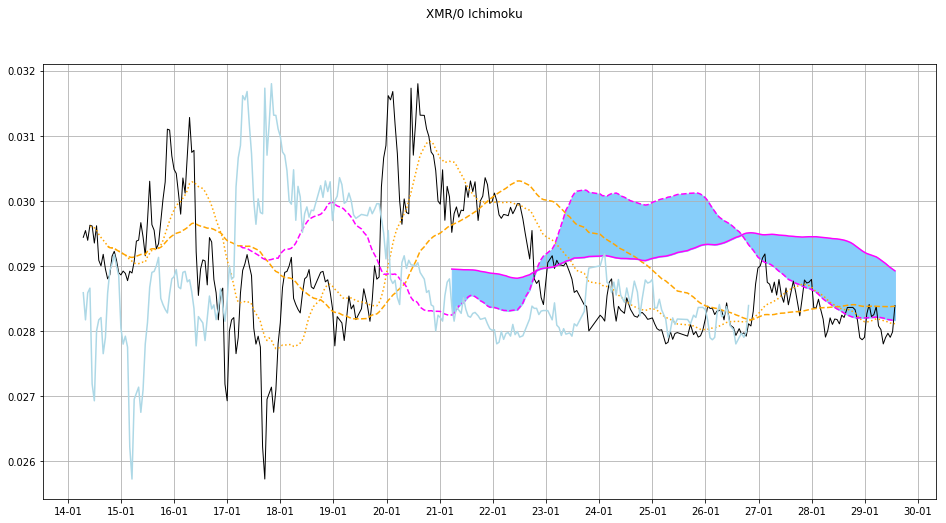

In [153]:



fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
fig.suptitle("%s/%d Ichimoku" % (transaction_coin, counter_coin))
ax1.xaxis.set_major_formatter(DateFormatter("%d-%m"))

fmt = ScalarFormatter(useOffset=False)
fmt.set_scientific(False)    
ax1.yaxis.set_major_formatter(fmt)

ax1.grid(True)
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax1.xaxis.set_major_locator(loc)

#ax1.plot(df.open, color='black', linewidth=1)
ax1.plot(df.close, color='black', linewidth=1)

ax1.plot(df.conversion, linestyle=':', color='orange')
ax1.plot(df.base, linestyle='--', color='orange')

ax1.plot(df.leading_a, linestyle='--', color='magenta')
ax1.plot(df.leading_b, linestyle='-', color='magenta')
ax1.fill_between(df.leading_a.index, df.leading_a, df.leading_b, color='lightskyblue')
ax1.plot(df.lagging, linestyle='-', color='lightblue')

#ax1.plot(df['lagging_below_cloud']*df.close/5, linestyle='-', color='red')
level = np.min(df.close)
ax1.plot(df[df.lagging_above_cloud>0].lagging_above_cloud * level, color='lightblue')
#(df[df.lagging_above_cloud>0].lagging_above_cloud * level).plot(ax=ax1,color='lightblue',style='.')

#(df[df.lagging_above_highest>0].lagging_above_highest * level *1.01).plot(ax=ax1,color='lightblue',style='.')

#(df[df.conversion_above_base>0].conversion_above_base * level *1.02).plot(ax=ax1,color='orange',style='.')

#(df[df.closing_cloud_breakout_up>0].closing_cloud_breakout_up * level *1.03).plot(ax=ax1,color='magenta',style='.')


for time_of_signal in df[df['kumo_breakout_up_rules']==True].index:
        ax1.axvline(time_of_signal, color='green')

plt.show()

# add elementary signals to local and try to debug

